In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("customstyle")
import sys
sys.path.append("../modules")
import PBD_analog
import matplotlib as mpl

with open("C:/Users/pveron/colors/palette1.txt", "r") as f:
    colors = f.read().splitlines()
with open("C:/Users/pveron/colors/ratp.txt", "r") as f:
    palette = f.read().splitlines()

labels = dict(l1 = "\\lambda_1", l2 = "\\lambda_2", l3 = "\\lambda_3",
              m1 = "\\mu_1", m2 = "\\mu_2")
long_labels = dict(l1 = "Initiation rate from good", l2 = "Completion rate", l3 = "Initiation rate from incipient",
              m1 = "Extinction rate of good", m2 = "Extinction rate of incipient")

In [42]:
par_default = {'l1': 0.3, 'l2': 0.4, 'l3': 0.3, 'm1': 0.1, 'm2': 0.1}
solver_kwargs = dict(atol = 1e-9, rtol = 1e-12)


var1 = 'l2'
var2 = 'l1'

val1 = [0.1, 0.2, 0.4, 0.6, 0.8]
val2 = [0.1, 0.3, 0.6, 1.5]

T = np.linspace(0,20,500)

Rates = np.zeros((len(val1), len(val2), len(T), 2))

for i1, x1 in enumerate(val1):
    for i2, x2 in enumerate(val2):
        par = par_default.copy()
        par[var1] = x1
        par[var2] = x2

        l,m = PBD_analog.PBD_to_time_dep_BD(T, **par, solver_kwargs=solver_kwargs)

        Rates[i1, i2, :, 0] = l
        Rates[i1, i2, :, 1] = m

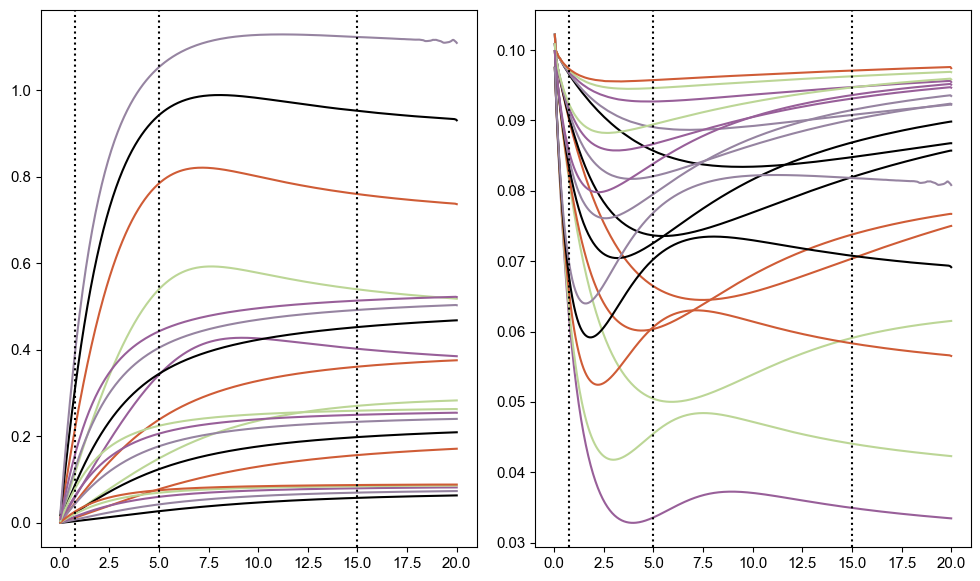

In [43]:
Tsteps = [0.75, 5, 15]

fig, axes = plt.subplots(1, 2, figsize = (10,6))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        axes[0].plot(T, Rates[i1, i2, :, 0])
        axes[1].plot(T, Rates[i1, i2, :, 1])

for i in range(2):
    for t in Tsteps:
        axes[i].axvline(t, ls = ":")

In [44]:
Rates_steps = np.zeros((len(val1), len(val2), len(Tsteps), 2))

for i1 in range(len(val1)):
    for i2 in range(len(val2)):
        for iR in (0,1):
            Rates_steps[i1, i2, :, iR] = np.interp(Tsteps, T, Rates[i1, i2, :, iR])        

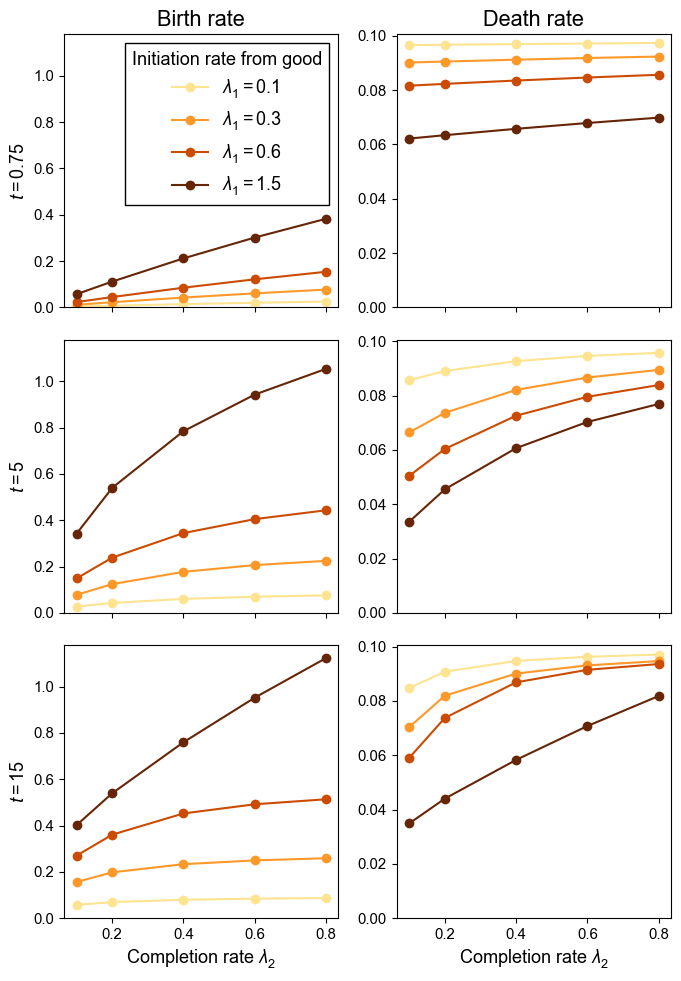

In [47]:
fig, axes = plt.subplots(len(Tsteps), 2, figsize = (7,10), sharex = True, sharey = "col")

cmap = mpl.colormaps["YlOrBr"]

for it, t in enumerate(Tsteps):
    for i2, x2 in enumerate(val2):
        for iR in (0,1):
            axes[it, iR].plot(val1, Rates_steps[:, i2, it, iR],  ls = "-", marker = "o", 
                              label = "${}={}$".format(labels[var2], x2),
                              color = cmap((1+i2) / len(val2)))
    axes[it, 0].set_ylabel("$t = {}$".format(t))
for iR in (0,1):
    axes[-1, iR].set_xlabel("{} ${}$".format(long_labels[var1], labels[var1]))
    axes[0, iR].set_title("{} rate".format(["Birth", "Death"][iR]))
    axes[0, iR].set_ylim(0, axes[0,iR].get_ylim()[1])

axes[0, 0].legend(title = long_labels[var2])